READ ME

Install the correct torch version from the website
If running on anaconda, install the libraries to your anaconda evnironment

Error loading widget is common, ignore the error
It will take 5 mins to load the image, your gpu may get hot

Refer to hugging face image to image for more info

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

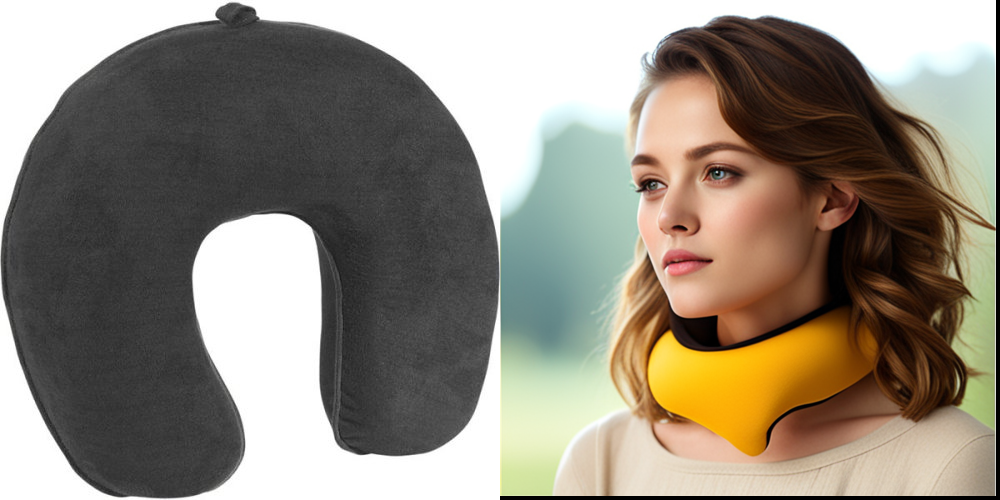

In [1]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

# This loads the pre-trained model, the model is "stabilityai/stable-diffusion-xl-refiner-1.0"
pipeline = AutoPipelineForImage2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.enable_model_cpu_offload()

# insert your image to be customised here
url = "https://images-na.ssl-images-amazon.com/images/I/41SyGjt4KdL.jpg"
init_image = load_image(url)

# Enter your prompt here
prompt = "Neck pillow, yellow colour, vibrant"

# pass prompt and image to pipeline
# stength (0-1): Adjust the creativity of the model, higher the value, the more creative the model is
# guidance_scale (0-10): Dictates how closely should the model follow the prompt, higher the value, closer to the prompt
image = pipeline(prompt, image=init_image, strength=1, guidance_scale=8.0).images[0]
image.show()
make_image_grid([init_image, image], rows=1, cols=2)